# Chapter 2: Distributions

## Background Notes
A common practice in exploratory data analysis will be to plot histograms of the different features. The overview this gives might ID outliers, trends, and some summary statistics. Domain knowledge is the best defense against mis-ID or mis-use of outlier data. It's important to know the data and the questions we are seeking to answer. 

Histograms are not useful in comparing two different distributions since some of the apparent difference will be do to traits irrellevant to frequency, like overall sample size. For this purpose we instead use probability mass functions. 

A histogram is a near complete description of the data. From it we can recreate the data set in all but order of points collected. Nevertheless we can use some summary statistics to better snapshot the data. Questions we might ask which we can asnwer with summary statistics include:
- central tendency
- modes
- spread 
- tails
- outliers

Summary statistics include:
- **mean**: One method to describe the central tendency. $$\bar{x} = \frac{1}{n} \Sigma x_i$$ 
Note that this is the formal definition of mean. The average is one of several summary statistics that are used to describe central tendency.

- **variance**: describes variability or spread of the data. $$S^2 = \frac{1}{n}\Sigma\left( x_i - \bar{x} \right)^2$$
The term in paranthesis is the deviation from the mean specific to that data point, and the variance is the mean square of the deviation. The other important term though, is $S$, which is the **standard deviation**. Note that the units of variance are squared and often difficult to interpret. 

- **effect size**: we might compare the means of two or more groups to determine the effect size of some feature. We can also calculate **Cohen's d** $$d = \frac{\bar{x_1} - \bar{x_2}}{s}$$
Here, $s$ is the pooled standard deviation. In short, Cohen's d is the difference in means expressed in terms of teh standard deviation. 

## Code Review
- dictionary.get(key, default) returns the value of the key in the dictionary. To create a dictionary with frequency of occurances for instance:
    
    hist = {}
    for x in t:
        hist[x] = hist.get(x, 0) + 1
        
- 

In [19]:
from __future__ import print_function, division
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import nsfg
import first
import seaborn as sb

Given a list of values, there are several ways to count the frequency of each value.

In [2]:
t = [1, 2, 2, 3, 5]

You can use a Python dictionary:

In [3]:
hist = {}
for x in t:
    hist[x] = hist.get(x, 0) + 1
    
hist

{1: 1, 2: 2, 3: 1, 5: 1}

You can use a `Counter` (which is a dictionary with additional methods):

In [4]:
from collections import Counter
counter = Counter(t)
counter

Counter({1: 1, 2: 2, 3: 1, 5: 1})

Or you can use the `Hist` object provided by `thinkstats2`:

In [5]:
import thinkstats2
hist = thinkstats2.Hist([1, 2, 2, 3, 5])
hist

Hist({1: 1, 2: 2, 3: 1, 5: 1})

`Hist` provides `Freq`, which looks up the frequency of a value.

In [6]:
hist.Freq(2)

2

You can also use the bracket operator, which does the same thing.

In [7]:
hist[2]

2

If the value does not appear, it has frequency 0.

In [8]:
hist[4]

0

The `Values` method returns the values:

In [8]:
hist.Values()

dict_keys([1, 2, 3, 5])

So you can iterate the values and their frequencies like this:

In [9]:
for val in sorted(hist.Values()):
    print(val, hist[val])

1 1
2 2
3 1
5 1


Or you can use the `Items` method:

In [10]:
for val, freq in hist.Items():
     print(val, freq)

1 1
2 2
3 1
5 1


`thinkplot` is a wrapper for `matplotlib` that provides functions that work with the objects in `thinkstats2`.

For example `Hist` plots the values and their frequencies as a bar graph.

`Config` takes parameters that label the x and y axes, among other things.

No handles with labels found to put in legend.


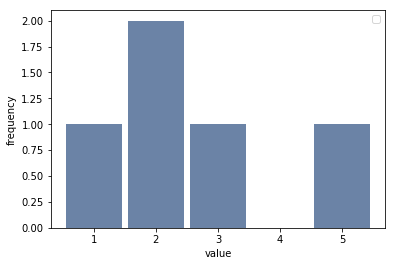

In [11]:
import thinkplot
thinkplot.Hist(hist)
thinkplot.Config(xlabel='value', ylabel='frequency')

As an example, I'll replicate some of the figures from the book.

First, I'll load the data from the pregnancy file and select the records for live births.

In [12]:
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]

Here's the histogram of birth weights in pounds.  Notice that `Hist` works with anything iterable, including a Pandas Series.  The `label` attribute appears in the legend when you plot the `Hist`. 

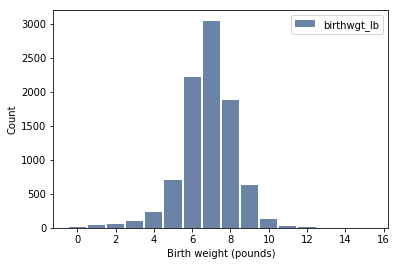

In [13]:
hist = thinkstats2.Hist(live.birthwgt_lb, label='birthwgt_lb')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Birth weight (pounds)', ylabel='Count')

Before plotting the ages, I'll apply `floor` to round down:

In [16]:
ages = np.floor(live.agepreg)

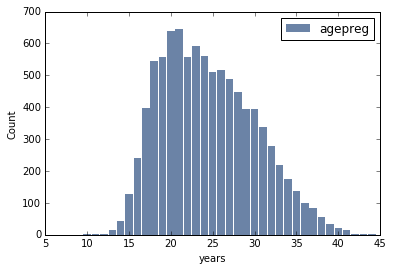

In [16]:
hist = thinkstats2.Hist(ages, label='agepreg')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='years', ylabel='Count')

As an exercise, plot the histogram of pregnancy lengths (column `prglngth`).

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


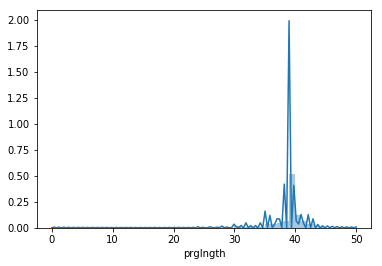

In [20]:
# Solution goes here
sb.distplot(live.prglngth)
plt.show()

`Hist` provides smallest, which select the lowest values and their frequencies.

In [18]:
for weeks, freq in hist.Smallest(10):
    print(weeks, freq)

10.0 2
11.0 1
12.0 1
13.0 14
14.0 43
15.0 128
16.0 242
17.0 398
18.0 546
19.0 559


Use `Largest` to display the longest pregnancy lengths.

In [22]:
# Solution goes here
largest_10 = live.prglngth.value_counts().sort_index(ascending = False)[:10]
largest_10

50       2
48       7
47       1
46       1
45      10
44      46
43     148
42     328
41     587
40    1116
Name: prglngth, dtype: int64

From live births, we can select first babies and others using `birthord`, then compute histograms of pregnancy length for the two groups.

In [24]:
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

first_hist = thinkstats2.Hist(firsts.prglngth, label='first')
other_hist = thinkstats2.Hist(others.prglngth, label='other')

We can use `width` and `align` to plot two histograms side-by-side.

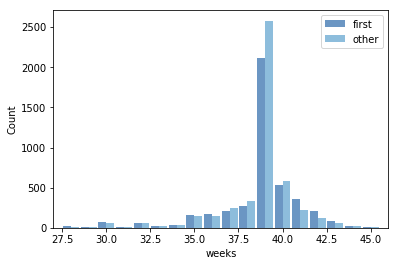

In [25]:
width = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(first_hist, align='right', width=width)
thinkplot.Hist(other_hist, align='left', width=width)
thinkplot.Config(xlabel='weeks', ylabel='Count', xlim=[27, 46])

`Series` provides methods to compute summary statistics:

In [26]:
mean = live.prglngth.mean()
var = live.prglngth.var()
std = live.prglngth.std()

Here are the mean and standard deviation:

In [27]:
mean, std

(38.56055968517709, 2.702343810070593)

As an exercise, confirm that `std` is the square root of `var`:

In [30]:
# Solution goes here
answer = std == np.sqrt(var)
answer

True

Here's are the mean pregnancy lengths for first babies and others:

In [25]:
firsts.prglngth.mean(), others.prglngth.mean()

(38.60095173351461, 38.52291446673706)

And here's the difference (in weeks):

In [26]:
firsts.prglngth.mean() - others.prglngth.mean()

0.07803726677754952

This functon computes the Cohen effect size, which is the difference in means expressed in number of standard deviations:

In [32]:
def CohenEffectSize(group1, group2):
    """Computes Cohen's effect size for two groups.
    
    group1: Series or DataFrame
    group2: Series or DataFrame
    
    returns: float if the arguments are Series;
             Series if the arguments are DataFrames
    """
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

Compute the Cohen effect size for the difference in pregnancy length for first babies and others.

In [35]:
# Solution goes here
first_others = CohenEffectSize(firsts.prglngth, others.prglngth)
first_others

0.028879044654449883

## Exercises

Using the variable `totalwgt_lb`, investigate whether first babies are lighter or heavier than others. 

Compute Cohen’s effect size to quantify the difference between the groups.  How does it compare to the difference in pregnancy length?

In [36]:
# Solution goes here
live.totalwgt_lb.mean(), others.totalwgt_lb.mean()

(7.265628457623368, 7.325855614973262)

In [41]:
# Solution goes here
CohenEffectSize(firsts.totalwgt_lb, others.totalwgt_lb)

-0.088672927072602

For the next few exercises, we'll load the respondent file:

In [42]:
resp = nsfg.ReadFemResp()

Make a histogram of <tt>totincr</tt> the total income for the respondent's family.  To interpret the codes see the [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=FEM&section=R&subSec=7876&srtLabel=607543).

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


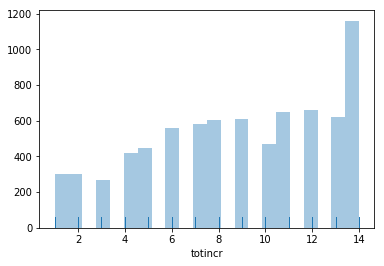

In [48]:
# Solution goes here
sb.distplot(resp.totincr, kde = False)

Make a histogram of <tt>age_r</tt>, the respondent's age at the time of interview.

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


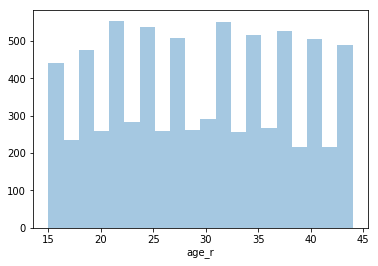

In [49]:
# Solution goes here
sb.distplot(resp.age_r, kde=False)

Make a histogram of <tt>numfmhh</tt>, the number of people in the respondent's household.

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


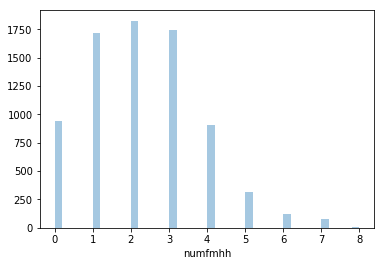

In [50]:
# Solution goes here
sb.distplot(resp.numfmhh, kde=False)

Make a histogram of <tt>parity</tt>, the number of children borne by the respondent.  How would you describe this distribution?

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


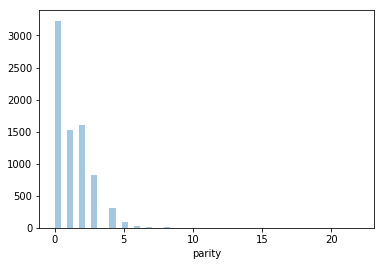

In [51]:
# Solution goes here
sb.distplot(resp.parity,kde=False)

Use Hist.Largest to find the largest values of <tt>parity</tt>.

In [56]:
# Solution goes here
resp.parity.value_counts().sort_index(ascending=False)[:10]

22      1
16      1
10      3
9       2
8       8
7      15
6      29
5      95
4     309
3     828
Name: parity, dtype: int64

Let's investigate whether people with higher income have higher parity.  Keep in mind that in this study, we are observing different people at different times during their lives, so this data is not the best choice for answering this question.  But for now let's take it at face value.

Use <tt>totincr</tt> to select the respondents with the highest income (level 14).  Plot the histogram of <tt>parity</tt> for just the high income respondents.

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


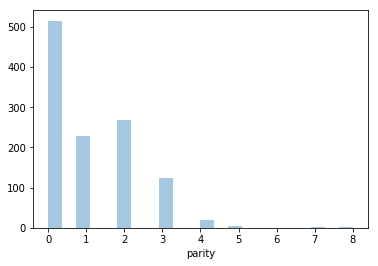

In [62]:
# Solution goes here
rich = resp[resp.totincr == 14]
sb.distplot(rich.parity,kde=False)

Find the largest parities for high income respondents.

In [66]:
# Solution goes here
rich.parity.value_counts().sort_index(ascending=False)[:10]

8      1
7      1
5      5
4     19
3    123
2    267
1    229
0    515
Name: parity, dtype: int64

Compare the mean <tt>parity</tt> for high income respondents and others.

In [67]:
# Solution goes here
not_rich = resp[resp.totincr<14]
rich.parity.mean(), not_rich.parity.mean()

(1.0758620689655172, 1.2495758136665125)

Compute the Cohen effect size for this difference.  How does it compare with the difference in pregnancy length for first babies and others?

In [68]:
# Solution goes here
CohenEffectSize(rich.parity,not_rich.parity)

-0.1251185531466061